In [6]:
import numpy as np
import h5py
import os
import re
import pandas as pd

import h5py

In [12]:
refrescar_consulta = True

if refrescar_consulta == True:

  # Get all file paths
  full_paths = []
  for top, dirs, files in os.walk('/Users/diego/Documents/tesis_goes16/inputs/trusted2'):
      for file in files:
          full_paths.append(os.path.join(top, file))
          print(file)
  print('-------------------------------------LISTA CREADA------------------------------------------')
  # Create a DataFrame
  df_paths = pd.DataFrame({'absolute_paths': full_paths})

  # Save the DataFrame to a Parquet file
  df_paths.to_parquet('/Users/diego/Documents/tesis_goes16/inputs/absolute_paths_h5.parquet', index=False, engine='pyarrow')
  print('-------------------------------------PARQUET CREADO------------------------------------------')

else:
  # Load the DataFrame from the Parquet file
  df_paths = pd.read_parquet('/Users/diego/Documents/tesis_goes16/inputs/absolute_paths_h5.parquet')

2023_07_09_20_59_59.h5
2023_11_30_03_49_58.h5
2023_06_27_10_00_00.h5
2023_11_03_12_30_00.h5
2024_02_11_23_50_00.h5
2024_09_10_01_20_00.h5
2023_07_04_04_20_00.h5
2024_08_02_04_29_59.h5
2024_12_05_09_10_01.h5
2023_10_20_06_10_00.h5
2023_10_11_17_39_59.h5
2024_09_21_08_20_02.h5
2024_09_14_21_29_59.h5
2024_02_15_03_59_59.h5
2024_04_20_07_59_59.h5
2024_06_06_05_39_58.h5
2023_06_12_21_20_00.h5
2024_11_18_12_00_00.h5
2024_11_20_07_59_59.h5
2024_07_05_09_10_01.h5
2023_05_20_06_10_00.h5
2024_04_29_03_29_59.h5
2024_09_30_19_29_59.h5
2024_05_24_16_00_00.h5
2024_04_03_22_29_59.h5
2024_07_20_14_10_02.h5
2023_01_02_23_30_04.h5
2023_07_27_21_50_00.h5
2024_05_30_04_09_57.h5
2024_07_09_10_40_00.h5
2024_12_09_10_40_00.h5
2023_12_27_21_50_00.h5
2024_10_15_07_29_59.h5
2024_08_05_19_59_59.h5
2024_11_03_22_29_59.h5
2024_06_27_20_19_59.h5
2024_03_29_07_59_59.h5
2024_06_12_11_39_59.h5
2023_12_19_14_50_01.h5
2023_01_25_14_20_01.h5
2024_05_18_23_50_00.h5
2023_02_28_09_50_04.h5
2023_03_01_16_10_01.h5
2024_06_21_

In [13]:
df_paths

,absolute_paths
0,/Users/diego/Documents/tesis_goes16/inputs/tru...
1,/Users/diego/Documents/tesis_goes16/inputs/tru...
2,/Users/diego/Documents/tesis_goes16/inputs/tru...
3,/Users/diego/Documents/tesis_goes16/inputs/tru...
4,/Users/diego/Documents/tesis_goes16/inputs/tru...
...,...
104727,/Users/diego/Documents/tesis_goes16/inputs/tru...
104728,/Users/diego/Documents/tesis_goes16/inputs/tru...
104729,/Users/diego/Documents/tesis_goes16/inputs/tru...
104730,/Users/diego/Documents/tesis_goes16/inputs/tru...


In [14]:
df_paths['filename'] = df_paths['absolute_paths'].apply(os.path.basename)
# Assuming df_paths is already created with the 'filename' column
# Define the exact syntax pattern for filenames
pattern = r'^\d{4}_\d{2}_\d{2}_\d{2}_\d{2}_\d{2}\.h5$'

# Create a column that checks if the filename matches the pattern
df_paths['is_good'] = df_paths['filename'].apply(lambda x: bool(re.match(pattern, x)))

# Split into two DataFrames based on the 'is_good' column
df_good = df_paths[df_paths['is_good']]
#df_bad = df_paths[~df_paths['is_good']]
df_good = df_good.sort_values(by='filename', ascending=True).reset_index(drop=True)

df_good 

,absolute_paths,filename,is_good
0,/Users/diego/Documents/tesis_goes16/inputs/tru...,2023_01_01_00_00_01.h5,True
1,/Users/diego/Documents/tesis_goes16/inputs/tru...,2023_01_01_00_10_01.h5,True
2,/Users/diego/Documents/tesis_goes16/inputs/tru...,2023_01_01_00_20_01.h5,True
3,/Users/diego/Documents/tesis_goes16/inputs/tru...,2023_01_01_00_30_03.h5,True
4,/Users/diego/Documents/tesis_goes16/inputs/tru...,2023_01_01_00_40_02.h5,True
...,...,...,...
104727,/Users/diego/Documents/tesis_goes16/inputs/tru...,2025_01_01_00_20_00.h5,True
104728,/Users/diego/Documents/tesis_goes16/inputs/tru...,2025_01_01_00_30_00.h5,True
104729,/Users/diego/Documents/tesis_goes16/inputs/tru...,2025_01_01_00_40_00.h5,True
104730,/Users/diego/Documents/tesis_goes16/inputs/tru...,2025_01_01_00_50_00.h5,True


In [15]:
from datetime import datetime

def extract_datetime(filename):
    try:
        return datetime.strptime(filename, '%Y_%m_%d_%H_%M_%S.h5')
    except ValueError:
        return None

# Apply the function to create the 'associated_time' column
df_good['associated_time'] = df_good['filename'].apply(extract_datetime)


df_cnt = df_good.groupby(df_good['associated_time'].dt.floor('H')).size().reset_index(name='file_count')
# Rename the columns for clarity
df_cnt.columns = ['date', 'file_count']

/var/folders/cc/xlhz3fls1gl063pj5mn3fyg80000gn/T/ipykernel_48100/2686223583.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_cnt = df_good.groupby(df_good['associated_time'].dt.floor('H')).size().reset_index(name='file_count')


In [16]:
df_cnt = df_good.groupby(df_good['associated_time'].dt.floor('H')).size().reset_index(name='file_count')
# Rename the columns for clarity
df_cnt.columns = ['date', 'file_count']

/var/folders/cc/xlhz3fls1gl063pj5mn3fyg80000gn/T/ipykernel_48100/260782429.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_cnt = df_good.groupby(df_good['associated_time'].dt.floor('H')).size().reset_index(name='file_count')


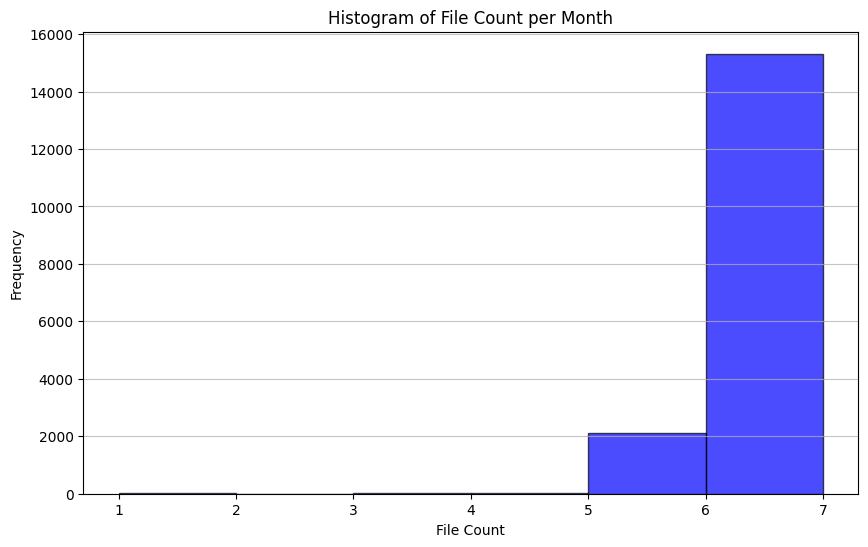

In [17]:
import matplotlib.pyplot as plt

# Plot the histogram of file counts
plt.figure(figsize=(10, 6))
plt.hist(df_cnt['file_count'], bins=6, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of File Count per Month')
plt.xlabel('File Count')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [18]:
import h5py
import numpy as np
from tqdm import tqdm

def create_dataset_from_files(file_paths, input_length, image_ahead, rain_amount_thresh):
    # Supongamos que todos los arrays tienen las mismas dimensiones
    with h5py.File(file_paths[0], "r") as f:
        first_array = f["rainfall"][:]
        img_size = first_array.shape[0]  # Dimensión de las imágenes (asumiendo cuadradas)
        num_pixels = img_size * img_size

    # Archivo combinado donde se guardarán los datos procesados
    output_filename = f"combined_dataset_input-length_{input_length}_img-ahead_{image_ahead}_rain-threshhold_{int(rain_amount_thresh * 100)}.h5"
    
    with h5py.File(output_filename, "w") as f_out:
        # Crear datasets para entrenamiento y prueba
        train_set = f_out.create_group("train")
        test_set = f_out.create_group("test")
        
        train_image_dataset = train_set.create_dataset(
            "images", shape=(1, input_length + image_ahead, img_size, img_size),
            maxshape=(None, input_length + image_ahead, img_size, img_size),
            dtype='float32', compression="gzip", compression_opts=9
        )
        train_timestamp_dataset = train_set.create_dataset(
            "timestamps", shape=(1, input_length + image_ahead, 1),
            maxshape=(None, input_length + image_ahead, 1),
            dtype=h5py.special_dtype(vlen=str), compression="gzip", compression_opts=9
        )
        
        test_image_dataset = test_set.create_dataset(
            "images", shape=(1, input_length + image_ahead, img_size, img_size),
            maxshape=(None, input_length + image_ahead, img_size, img_size),
            dtype='float32', compression="gzip", compression_opts=9
        )
        test_timestamp_dataset = test_set.create_dataset(
            "timestamps", shape=(1, input_length + image_ahead, 1),
            maxshape=(None, input_length + image_ahead, 1),
            dtype=h5py.special_dtype(vlen=str), compression="gzip", compression_opts=9
        )

        # Dividir archivos en entrenamiento y prueba (80% entrenamiento - 20% prueba)
        split_index = int(len(file_paths) * 0.8)
        train_files = file_paths[:split_index]
        test_files = file_paths[split_index:]

        # Procesar archivos para entrenamiento y prueba
        for dataset_files, image_dataset, timestamp_dataset in [
            (train_files, train_image_dataset, train_timestamp_dataset),
            (test_files, test_image_dataset, test_timestamp_dataset)
        ]:
            first = True
            for file_path in tqdm(dataset_files):
                with h5py.File(file_path, "r") as f_in:
                    rainfall_data = f_in["rainfall"][:]
                    timestamps = np.arange(rainfall_data.shape[0])  # Crear timestamps ficticios si no existen
                    
                    for i in range(input_length + image_ahead, len(rainfall_data)):
                        if np.sum(rainfall_data[i] > 0) >= num_pixels * rain_amount_thresh:
                            imgs = rainfall_data[i - (input_length + image_ahead):i]
                            timestamps_img = timestamps[i - (input_length + image_ahead):i].reshape(-1, 1)
                            
                            # Extender el dataset y agregar la entrada
                            if first:
                                first = False
                            else:
                                image_dataset.resize(image_dataset.shape[0] + 1, axis=0)
                                timestamp_dataset.resize(timestamp_dataset.shape[0] + 1, axis=0)
                            
                            image_dataset[-1] = imgs
                            timestamp_dataset[-1] = timestamps_img

    print(f"Dataset combinado creado exitosamente en {output_filename}")



#df_good = pd.read_csv("file_paths.csv")  # Archivo CSV con las rutas de los archivos .h5
file_paths = df_good['absolute_paths'].tolist()

create_dataset_from_files(file_paths=file_paths,
                            input_length=12,
                            image_ahead=6,
                            rain_amount_thresh=0.2)

create_dataset_from_files(file_paths=file_paths,
                            input_length=12,
                            image_ahead=6,
                            rain_amount_thresh=0.5)


100%|██████████| 20947/20947 [00:17<00:00, 1228.68it/s]


Dataset combinado creado exitosamente en combined_dataset_input-length_12_img-ahead_6_rain-threshhold_20.h5


100%|██████████| 20947/20947 [00:15<00:00, 1352.57it/s]

Dataset combinado creado exitosamente en combined_dataset_input-length_12_img-ahead_6_rain-threshhold_50.h5


In [5]:
file_path = df_good['absolute_paths'].iloc[0]

with h5py.File(file_path, 'r') as f:
    # Read the 'rainfall' dataset
    rainfall_data = f['rainfall'][:]

In [6]:
print(rainfall_data.shape)
print(rainfall_data)

(110, 111)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [2.7880385  2.8628135  2.7880385  ... 3.268735   4.474291   5.319706  ]
 [2.7804084  2.7804084  2.0341847  ... 3.80742    3.80742    4.474291  ]
 [2.220359   0.99954313 0.         ... 3.80742    5.319706   5.319706  ]]


In [ ]:
import h5py
import numpy as np
from tqdm import tqdm


def create_dataset(input_length, image_ahead, rain_amount_thresh):
    with h5py.File("data/precipitation/RAD_NL25_RAC_5min_train_test_2016-2019.h5", "r", rdcc_nbytes=1024 ** 3) as orig_f:
        train_images = orig_f["train"]["images"]
        train_timestamps = orig_f["train"]["timestamps"]
        test_images = orig_f["test"]["images"]
        test_timestamps = orig_f["test"]["timestamps"]
        print("Train shape", train_images.shape)
        print("Test shape", test_images.shape)
        imgSize = train_images.shape[1]
        num_pixels = imgSize * imgSize

        filename = f"data/precipitation/train_test_2016-2019_input-length_{input_length}_img-ahead_{image_ahead}_rain-threshhold_{int(rain_amount_thresh * 100)}.h5"
        with h5py.File(filename, "w", rdcc_nbytes=1024 ** 3) as f:
            train_set = f.create_group("train")
            test_set = f.create_group("test")
            train_image_dataset = train_set.create_dataset("images",
                                                           shape=(1, input_length + image_ahead, imgSize, imgSize),
                                                           maxshape=(None, input_length + image_ahead, imgSize, imgSize),
                                                           dtype='float32', compression="gzip", compression_opts=9)
            train_timestamp_dataset = train_set.create_dataset("timestamps", shape=(1, input_length + image_ahead, 1),
                                                               maxshape=(None, input_length + image_ahead, 1),
                                                               dtype=h5py.special_dtype(vlen=str), compression="gzip",
                                                               compression_opts=9)
            test_image_dataset = test_set.create_dataset("images", shape=(1, input_length + image_ahead, imgSize, imgSize),
                                                         maxshape=(None, input_length + image_ahead, imgSize, imgSize),
                                                         dtype='float32', compression="gzip", compression_opts=9)
            test_timestamp_dataset = test_set.create_dataset("timestamps", shape=(1, input_length + image_ahead, 1),
                                                             maxshape=(None, input_length + image_ahead, 1),
                                                             dtype=h5py.special_dtype(vlen=str), compression="gzip",
                                                             compression_opts=9)

            origin = [[train_images, train_timestamps], [test_images, test_timestamps]]
            datasets = [[train_image_dataset, train_timestamp_dataset], [test_image_dataset, test_timestamp_dataset]]
            for origin_id, (images, timestamps) in enumerate(origin):
                image_dataset, timestamp_dataset = datasets[origin_id]
                first = True
                for i in tqdm(range(input_length + image_ahead, len(images))):
                    # If threshold of rain is bigger in the target image: add sequence to dataset
                    if np.sum(images[i] > 0) >= num_pixels * rain_amount_thresh:
                        imgs = images[i - (input_length + image_ahead):i]
                        timestamps_img = timestamps[i - (input_length + image_ahead):i]
                        #                     print(imgs.shape)
                        #                     print(timestamps_img.shape)
                        # extend the dataset by 1 and add the entry
                        if first:
                            first = False
                        else:
                            image_dataset.resize(image_dataset.shape[0] + 1, axis=0)
                            timestamp_dataset.resize(timestamp_dataset.shape[0] + 1, axis=0)
                        image_dataset[-1] = imgs
                        timestamp_dataset[-1] = timestamps_img



    create_dataset(input_length=12, image_ahead=6, rain_amount_thresh=0.2)
    create_dataset(input_length=12, image_ahead=6, rain_amount_thresh=0.5)